In [25]:
import numpy as np
import matplotlib.pyplot as plt

g    = 9.81 
kT   = 28.0
Tmax = 4*kT
Tstar   = 0.7 * Tmax
m    = 5.5

dt = lambda zstar,phistar : np.sqrt(2*zstar/(g-Tstar/m*np.cos(phistar)))
dt(0.2,np.deg2rad(50))

# zstar = lambda

0.7860656332409994

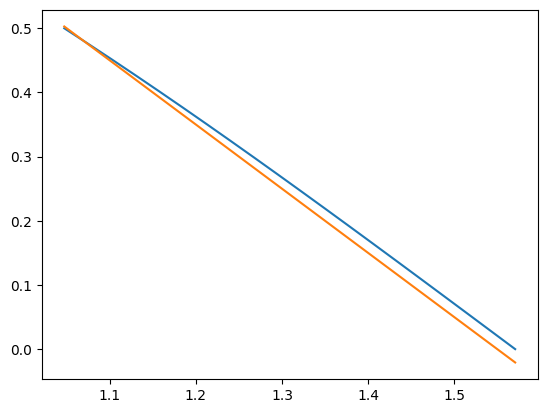

In [23]:
theta = np.linspace(np.deg2rad(60),np.deg2rad(90),20)
plt.plot(theta,np.cos(theta))
plt.plot(theta,1.55-theta)

In [88]:
c = 1.55
phistar = np.deg2rad(60)
vmax    = np.pi/4
trampup = 0.8
k       = (Tmax-Tstar)/trampup
vstar   = -0.0
zstar   = -0.8

# define polynomial coefficients
A = k/m*vmax
B = Tstar/m*vmax-k/m*c + k/m*phistar
C = g - Tstar/m*(c-phistar)
D = vstar
E = zstar

poly = [1/12*A,1/6*B,1/2*C,D,E]
roots = np.roots(poly)
real_valued = roots.real[abs(roots.imag)<1e-5] # where I chose 1-e5 as a threshold
print('roots = ', roots)
print('real_valued = ', real_valued)

# get only positive value for time
idx = np.where(real_valued>=0.0)
tf = real_valued[idx].squeeze()

# get the final quantities
zdot = 1/3*A*tf**3 + 1/2*B*tf**2 + C*tf + D
z    = np.polyval(poly,tf)
phif = np.clip(phistar + vmax*tf,0,np.pi/2)
Tf   = Tstar   + k*tf

# print time and final quantities
print('tf = ',tf, 'seconds')
print('zdot = ',zdot, 'm/s')
print('z = ',z, 'm')
print('phif = ',np.rad2deg(phif),'degrees')
print('Tf = ',Tf,'N')
print('Tmax = ',Tmax,'N')


roots =  [-0.93357584+1.17777145j -0.93357584-1.17777145j -1.18422005+0.j
  0.59841432+0.j        ]
real_valued =  [-1.18422005  0.59841432]
tf =  0.5984143166613443 seconds
zdot =  3.326963531236421 m/s
z =  2.220446049250313e-16 m
phif =  86.92864424976048 degrees
Tf =  103.53340129977646 N
Tmax =  112.0 N
